### Mini batch Task01
- 다이아몬드의 특성을 회귀분석하여, 예상 가격을 예측한다.

In [1]:
import pandas as pd
d_df = pd.read_csv('./datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [2]:
d_df.cut.value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [3]:
d_df.color.value_counts()

color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [4]:
d_df.clarity.value_counts()

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [5]:
d_df = d_df.drop(labels=['Unnamed: 0'], axis=1)
d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [6]:
# d_df.corr()['price'].sort_values(ascending=False)[1:]

In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

pre_d_df = d_df.copy()
columns = ['cut', 'color', 'clarity']

for column in columns:
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    result = one_hot_encoder.fit_transform(pre_d_df[[column]])

    pre_d_df = pd.concat([pre_d_df, 
                          pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], 
                         axis=1)

In [8]:
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z,...,"(I,)","(J,)","(I1,)","(IF,)","(SI1,)","(SI2,)","(VS1,)","(VS2,)","(VVS1,)","(VVS2,)"
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,0,0,0,0,0,1,0,0,0,0
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,...,0,0,0,0,0,1,0,0,0,0
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,...,0,0,0,0,1,0,0,0,0,0
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,...,0,0,0,0,1,0,0,0,0,0


In [9]:
pre_d_df = pre_d_df.drop(labels=['cut', 'color', 'clarity'], axis=1)
pre_d_df

,carat,depth,table,price,x,y,z,"(Fair,)","(Good,)","(Ideal,)",...,"(I,)","(J,)","(I1,)","(IF,)","(SI1,)","(SI2,)","(VS1,)","(VS2,)","(VVS1,)","(VVS2,)"
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,0,0,1,...,0,0,0,0,0,1,0,0,0,0
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
pre_d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53943 non-null  float64
 1   depth         53943 non-null  float64
 2   table         53943 non-null  float64
 3   price         53943 non-null  int64  
 4   x             53943 non-null  float64
 5   y             53943 non-null  float64
 6   z             53943 non-null  float64
 7   (Fair,)       53943 non-null  int8   
 8   (Good,)       53943 non-null  int8   
 9   (Ideal,)      53943 non-null  int8   
 10  (Premium,)    53943 non-null  int8   
 11  (Very Good,)  53943 non-null  int8   
 12  (D,)          53943 non-null  int8   
 13  (E,)          53943 non-null  int8   
 14  (F,)          53943 non-null  int8   
 15  (G,)          53943 non-null  int8   
 16  (H,)          53943 non-null  int8   
 17  (I,)          53943 non-null  int8   
 18  (J,)          53943 non-nu

In [11]:
pre_d_df.columns = ['carat', 
                    'depth', 
                    'table', 
                    'price', 
                    'x', 
                    'y', 
                    'z', 
                    'Fair', 
                    'Good', 
                    'Ideal', 'Premium', 'Very Good', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']

pre_d_df

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64,0,0,1,...,0,0,0,0,0,1,0,0,0,0
53940,0.71,60.5,55.0,2756,5.79,5.74,3.49,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53941,0.71,59.8,62.0,2756,5.74,5.73,3.43,0,0,0,...,0,0,0,0,1,0,0,0,0,0


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'Fair'}>,
        <Axes: title={'center': 'Good'}>,
        <Axes: title={'center': 'Ideal'}>],
       [<Axes: title={'center': 'Premium'}>,
        <Axes: title={'center': 'Very Good'}>,
        <Axes: title={'center': 'D'}>, <Axes: title={'center': 'E'}>,
        <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'G'}>, <Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'I'}>, <Axes: title={'center': 'J'}>,
        <Axes: title={'center': 'I1'}>],
       [<Axes: title={'center': 'IF'}>, <Axes: title={'center': 'SI1'}>,
        <Axes: title={'center': 'SI2'}>, <Axes: title={'center': 'VS1'}>,
        <Axes: title={'center': 'VS2'}>],
       [<Axes: title={'cen

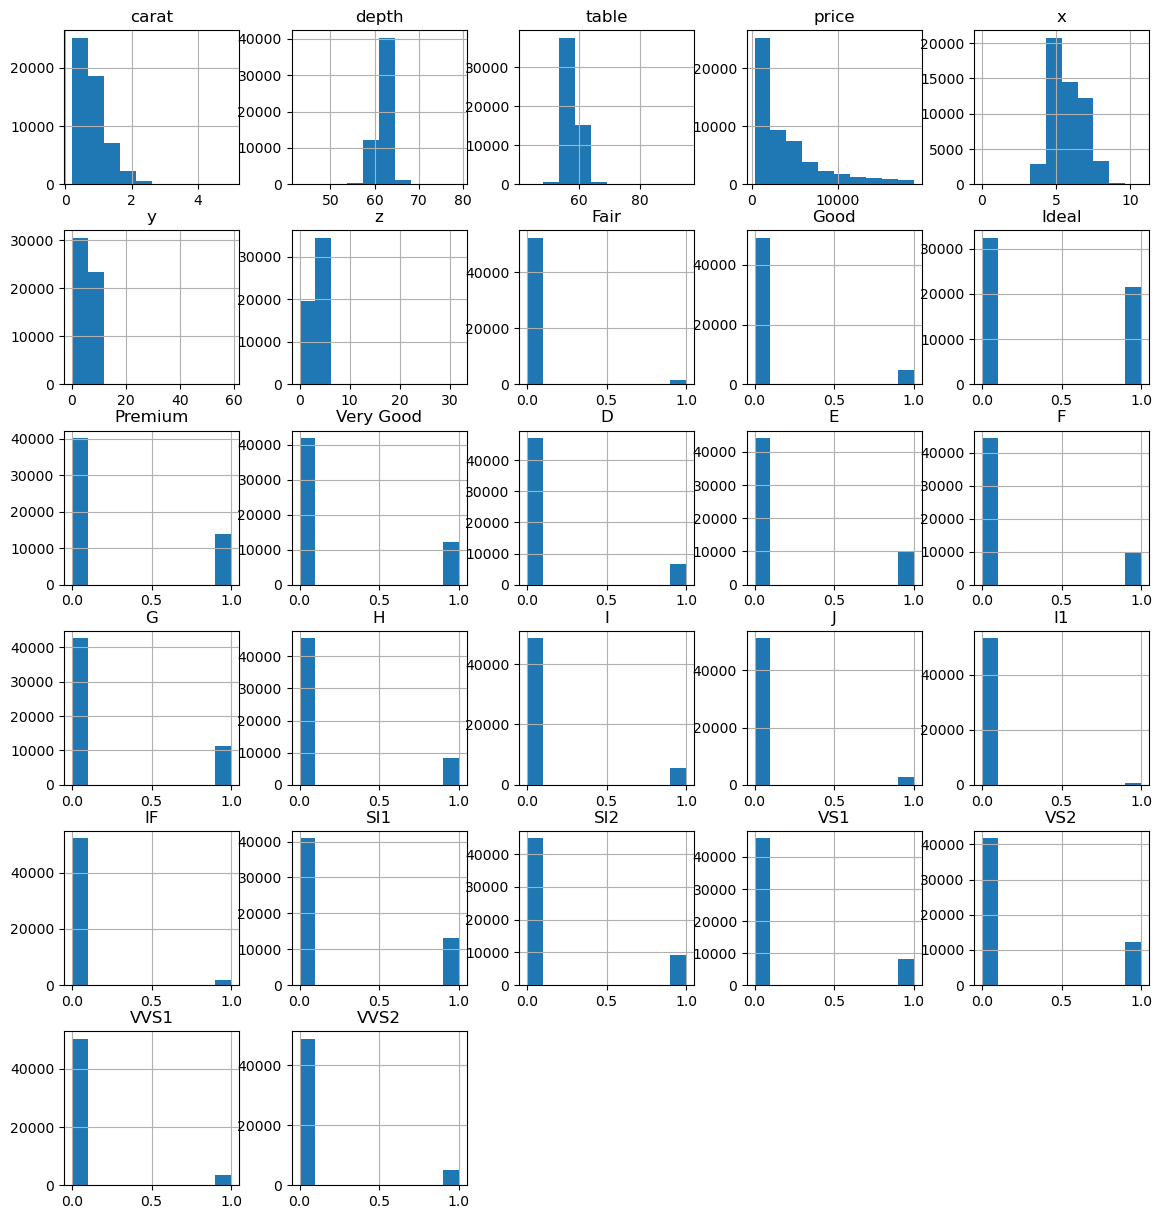

In [12]:
pre_d_df.hist(figsize=(14, 15))

<Axes: >

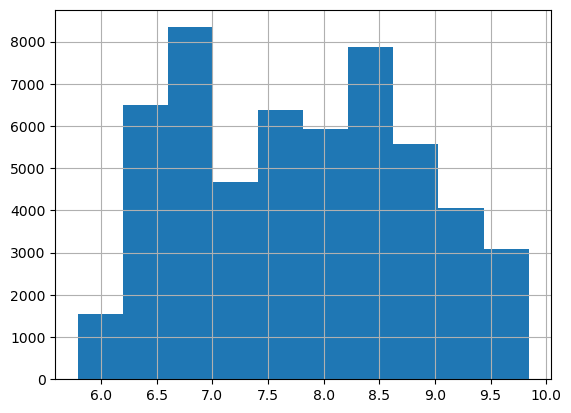

In [13]:
np.log1p(pre_d_df['price']).hist()

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'Fair'}>,
        <Axes: title={'center': 'Good'}>,
        <Axes: title={'center': 'Ideal'}>],
       [<Axes: title={'center': 'Premium'}>,
        <Axes: title={'center': 'Very Good'}>,
        <Axes: title={'center': 'D'}>, <Axes: title={'center': 'E'}>,
        <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'G'}>, <Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'I'}>, <Axes: title={'center': 'J'}>,
        <Axes: title={'center': 'I1'}>],
       [<Axes: title={'center': 'IF'}>, <Axes: title={'center': 'SI1'}>,
        <Axes: title={'center': 'SI2'}>, <Axes: title={'center': 'VS1'}>,
        <Axes: title={'center': 'VS2'}>],
       [<Axes: title={'cen

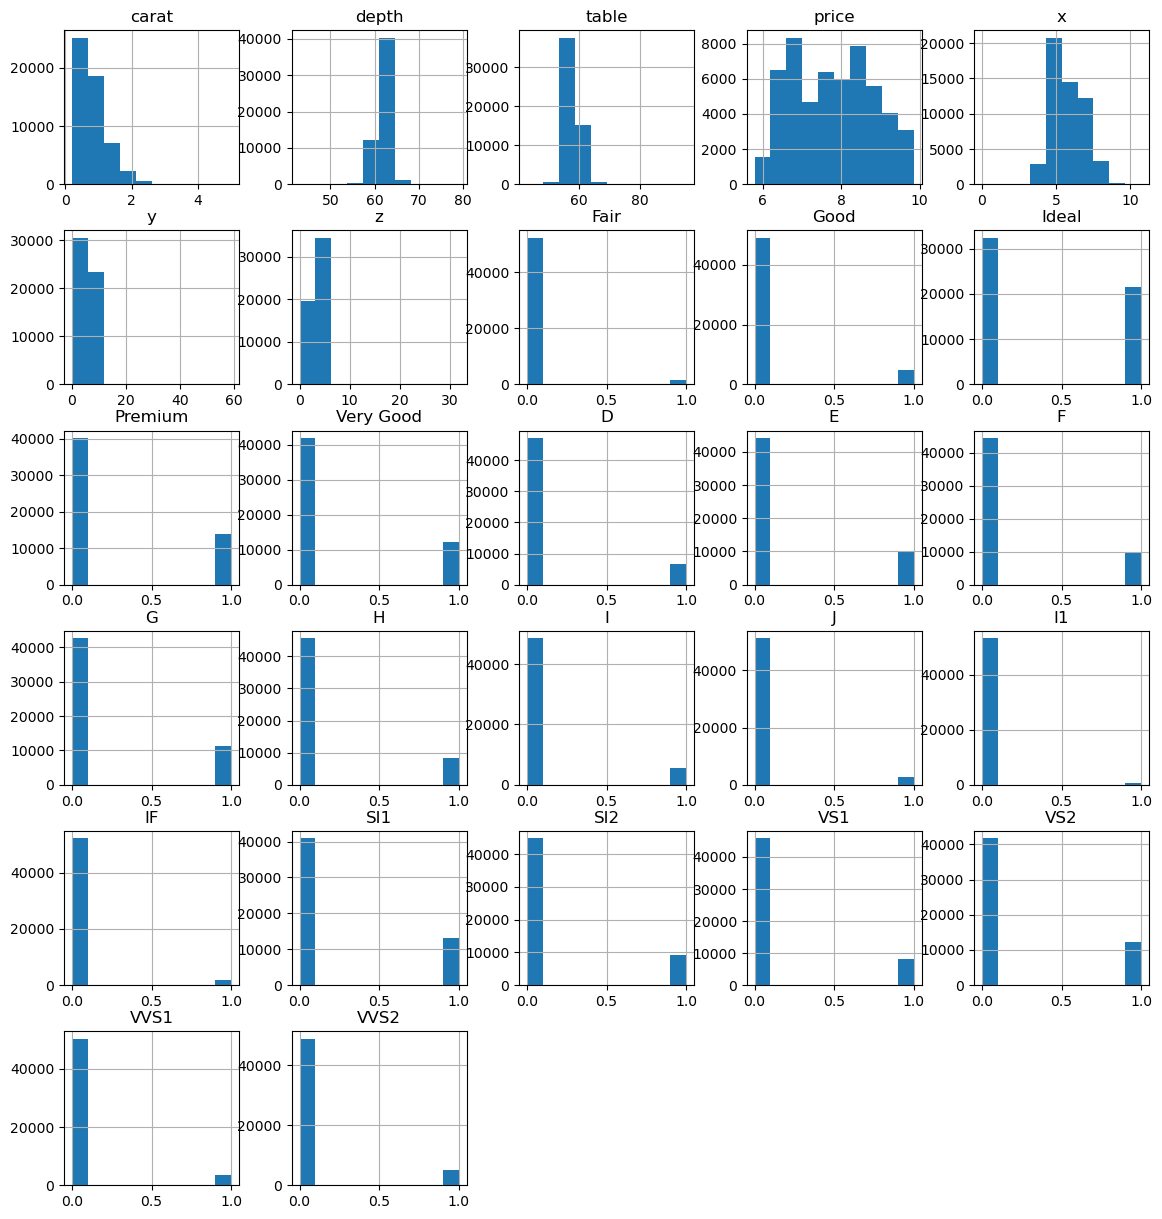

In [14]:
pre_d_df.loc[:, 'price'] = np.log1p(pre_d_df['price'])
pre_d_df.hist(figsize=(14, 15))

In [15]:
pre_d_df.corr()['price'].sort_values(ascending=False)[1:]

x            0.958027
y            0.936190
z            0.935233
carat        0.920252
SI2          0.169775
table        0.158203
Premium      0.094751
J            0.082972
I            0.077838
H            0.055371
Fair         0.052999
SI1          0.034112
I1           0.028007
Good         0.017469
Very Good    0.006313
G            0.001424
depth        0.000852
F           -0.011124
VS2         -0.012682
VS1         -0.025813
D           -0.063466
IF          -0.069684
VVS2        -0.081205
E           -0.096278
Ideal       -0.118434
VVS1        -0.123245
Name: price, dtype: float64

In [16]:
columns = ['x', 'y', 'z', 'carat', 'price']
pre_d_df = pre_d_df.loc[:, columns]
pre_d_df

,x,y,z,carat,price
0,3.95,3.98,2.43,0.23,5.789960
1,3.89,3.84,2.31,0.21,5.789960
2,4.05,4.07,2.31,0.23,5.793014
3,4.20,4.23,2.63,0.29,5.814131
4,4.34,4.35,2.75,0.31,5.817111
...,...,...,...,...,...
53938,6.15,6.12,3.74,0.86,7.922261
53939,5.83,5.87,3.64,0.75,7.922261
53940,5.79,5.74,3.49,0.71,7.921898
53941,5.74,5.73,3.43,0.71,7.921898


In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 확인할 데이터프레임
dataframe = pre_d_df

std = StandardScaler()

features = dataframe.iloc[:, :-1].columns

total_count = dataframe.shape[0]
for feature in features:
    std_df = std.fit_transform(dataframe[[feature]])
    count = ((std_df < -1.96) | (std_df > 1.96)).sum()
    print(f'{feature}: {count}건, {np.round(count / total_count * 100, 4)}%')

x: 2074건, 3.8448%
y: 1898건, 3.5185%
z: 1962건, 3.6372%
carat: 2509건, 4.6512%


In [19]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_pre_d_df = std.fit_transform(pre_d_df.iloc[:, :-1])

In [20]:
std_pre_d_df = pd.DataFrame(std_pre_d_df, columns=pre_d_df.iloc[:, :-1].columns)
std_pre_d_df

,x,y,z,carat
0,-1.587882,-1.536239,-1.571166,-1.198189
1,-1.641372,-1.658821,-1.741217,-1.240384
2,-1.498733,-1.457436,-1.741217,-1.198189
3,-1.365010,-1.317342,-1.287749,-1.071605
4,-1.240202,-1.212272,-1.117699,-1.029411
...,...,...,...,...
53938,0.373393,0.337515,0.285218,0.130941
53939,0.088116,0.118619,0.143509,-0.101129
53940,0.052457,0.004793,-0.069054,-0.185518
53941,0.007882,-0.003963,-0.154079,-0.185518


In [21]:
# 이상치 제거
features = std_pre_d_df.iloc[:, :-1]
for column in features.columns:
    std_pre_d_df.drop(
        std_pre_d_df[~std_pre_d_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_d_df[~std_pre_d_df[column].between(-1.96, 1.96)].shape[0]}건')

x: 0건
y: 0건
z: 0건


In [22]:
pre_d_df = pre_d_df.iloc[std_pre_d_df.index].reset_index(drop=True)
pre_d_df

,x,y,z,carat,price
0,3.95,3.98,2.43,0.23,5.789960
1,3.89,3.84,2.31,0.21,5.789960
2,4.05,4.07,2.31,0.23,5.793014
3,4.20,4.23,2.63,0.29,5.814131
4,4.34,4.35,2.75,0.31,5.817111
...,...,...,...,...,...
51679,6.15,6.12,3.74,0.86,7.922261
51680,5.83,5.87,3.64,0.75,7.922261
51681,5.79,5.74,3.49,0.71,7.921898
51682,5.74,5.73,3.43,0.71,7.921898


In [23]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(124)

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=100, shuffle=True)

l_r = Linear(4, 1)

optimizer = SGD(l_r.parameters(), lr=0.0001)

epochs = 1000

for epoch in range(1, epochs + 1):
    for i, samples in enumerate(dl):
        
        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(H, y_train)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 100/1000, Batch: 1/414, W1: 0.2122, W2: 0.7082, W3: 0.6851, W4: -0.5856, b: 0.5506
loss: 0.0956
Epoch: 100/1000, Batch: 2/414, W1: 0.2122, W2: 0.7082, W3: 0.6851, W4: -0.5856, b: 0.5506
loss: 0.124
Epoch: 100/1000, Batch: 3/414, W1: 0.2121, W2: 0.7082, W3: 0.6851, W4: -0.5856, b: 0.5506
loss: 0.1296
Epoch: 100/1000, Batch: 4/414, W1: 0.2122, W2: 0.7082, W3: 0.6851, W4: -0.5856, b: 0.5506
loss: 0.1129
Epoch: 100/1000, Batch: 5/414, W1: 0.2122, W2: 0.7082, W3: 0.6851, W4: -0.5856, b: 0.5506
loss: 0.1052
Epoch: 100/1000, Batch: 6/414, W1: 0.2122, W2: 0.7082, W3: 0.6851, W4: -0.5856, b: 0.5506
loss: 0.0966
Epoch: 100/1000, Batch: 7/414, W1: 0.2122, W2: 0.7083, W3: 0.6851, W4: -0.5856, b: 0.5506
loss: 0.1248
Epoch: 100/1000, Batch: 8/414, W1: 0.2122, W2: 0.7083, W3: 0.6851, W4: -0.5857, b: 0.5507
loss: 0.0974
Epoch: 100/1000, Batch: 9/414, W1: 0.2122, W2: 0.7082, W3: 0.6851, W4: -0.5857, b: 0.5507
loss: 0.1135
Epoch: 100/1000, Batch: 10/414, W1: 0.2121, W2: 0.7082, W3: 0.6851, W4: -0

In [24]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE))

In [25]:
y_test = y_test.detach().numpy()

H = l_r(X_test)
prediction = H.detach().numpy()

In [26]:
get_evaluation(y_test, prediction)

MSE: 0.0661, RMSE: 0.2571, MSLE: 0.0009, RMSLE: 0.0297
